In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Read file

In [2]:
df = pd.read_csv('credit_dataset.csv')

In [3]:
df.head(5)

,Unnamed: 0,ID,GENDER,CAR,REALITY,NO_OF_CHILD,INCOME,INCOME_TYPE,EDUCATION_TYPE,FAMILY_TYPE,HOUSE_TYPE,FLAG_MOBIL,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED,TARGET
0,0,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,2.0,29,59,3,0
1,1,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,4,52,8,0
2,2,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,26,52,8,0
3,3,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,26,52,8,0
4,4,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,38,52,8,0


## Target variable class distribution

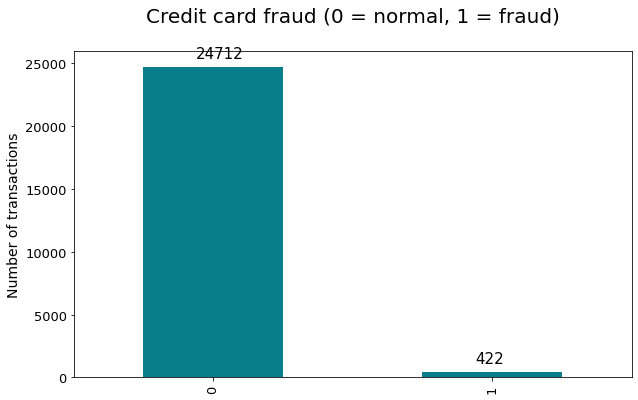

In [4]:
ax = df['TARGET'].value_counts().plot(kind='bar', figsize=(10, 6), fontsize=13, color='#087E8B')
ax.set_title('Credit card fraud (0 = normal, 1 = fraud)', size=20, pad=30)
ax.set_ylabel('Number of transactions', fontsize=14)

for i in ax.patches:
    ax.text(i.get_x() + 0.19, i.get_height() + 700, str(round(i.get_height(), 2)), fontsize=15)

## Data preparation

In [5]:
# Remap to integers
df['GENDER'] = [0 if x == 'M' else 1 for x in df['GENDER']]
df['CAR'] = [1 if x == 'Y' else 0 for x in df['CAR']]
df['REALITY'] = [1 if x == 'Y' else 0 for x in df['REALITY']]

# Create dummy variables
dummy_income_type = pd.get_dummies(df['INCOME_TYPE'], prefix='INC_TYPE', drop_first=True)
dummy_edu_type = pd.get_dummies(df['EDUCATION_TYPE'], prefix='EDU_TYPE', drop_first=True)
dummy_family_type = pd.get_dummies(df['FAMILY_TYPE'], prefix='FAM_TYPE', drop_first=True)
dummy_house_type = pd.get_dummies(df['HOUSE_TYPE'], prefix='HOUSE_TYPE', drop_first=True)

# Drop unnecessary columns
to_drop = ['Unnamed: 0', 'ID', 'FLAG_MOBIL', 'INCOME_TYPE',
           'EDUCATION_TYPE', 'FAMILY_TYPE', 'HOUSE_TYPE']
df.drop(to_drop, axis=1, inplace=True)

# Merge into a single data frame
merged = pd.concat([df, dummy_income_type, dummy_edu_type, dummy_family_type, dummy_house_type], axis=1)
merged.head()

,GENDER,CAR,REALITY,NO_OF_CHILD,INCOME,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,...,EDU_TYPE_Secondary / secondary special,FAM_TYPE_Married,FAM_TYPE_Separated,FAM_TYPE_Single / not married,FAM_TYPE_Widow,HOUSE_TYPE_House / apartment,HOUSE_TYPE_Municipal apartment,HOUSE_TYPE_Office apartment,HOUSE_TYPE_Rented apartment,HOUSE_TYPE_With parents
0,0,1,1,0,112500.0,0,0,0,2.0,29,...,1,1,0,0,0,1,0,0,0,0
1,1,0,1,0,270000.0,0,1,1,1.0,4,...,1,0,0,1,0,1,0,0,0,0
2,1,0,1,0,270000.0,0,1,1,1.0,26,...,1,0,0,1,0,1,0,0,0,0
3,1,0,1,0,270000.0,0,1,1,1.0,26,...,1,0,0,1,0,1,0,0,0,0
4,1,0,1,0,270000.0,0,1,1,1.0,38,...,1,0,0,1,0,1,0,0,0,0


## Data scaling

In [6]:
from sklearn.preprocessing import MinMaxScaler

# Scale only columns that have values greater than 1
to_scale = [col for col in df.columns if df[col].max() > 1]
mms = MinMaxScaler()
scaled = mms.fit_transform(merged[to_scale])
scaled = pd.DataFrame(scaled, columns=to_scale)

# Replace original columns with scaled ones
for col in scaled:
    merged[col] = scaled[col]

merged.head()

,GENDER,CAR,REALITY,NO_OF_CHILD,INCOME,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,...,EDU_TYPE_Secondary / secondary special,FAM_TYPE_Married,FAM_TYPE_Separated,FAM_TYPE_Single / not married,FAM_TYPE_Widow,HOUSE_TYPE_House / apartment,HOUSE_TYPE_Municipal apartment,HOUSE_TYPE_Office apartment,HOUSE_TYPE_Rented apartment,HOUSE_TYPE_With parents
0,0,1,1,0.0,0.055233,0,0,0,0.052632,0.483333,...,1,1,0,0,0,1,0,0,0,0
1,1,0,1,0.0,0.156977,0,1,1,0.000000,0.066667,...,1,0,0,1,0,1,0,0,0,0
2,1,0,1,0.0,0.156977,0,1,1,0.000000,0.433333,...,1,0,0,1,0,1,0,0,0,0
3,1,0,1,0.0,0.156977,0,1,1,0.000000,0.433333,...,1,0,0,1,0,1,0,0,0,0
4,1,0,1,0.0,0.156977,0,1,1,0.000000,0.633333,...,1,0,0,1,0,1,0,0,0,0


## Machine Learning without SMOTE

In [7]:
from sklearn.model_selection import train_test_split

X = merged.drop('TARGET', axis=1)
y = merged['TARGET']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

print(f'''% Positive class in Train = {np.round(y_train.value_counts(normalize=True)[1] * 100, 2)}
% Positive class in Test  = {np.round(y_test.value_counts(normalize=True)[1] * 100, 2)}''')

% Positive class in Train = 1.69
% Positive class in Test  = 1.65


Accuracy = 0.98
Recall = 0.09



<AxesSubplot:title={'center':'Confusion Matrix (without SMOTE)'}>

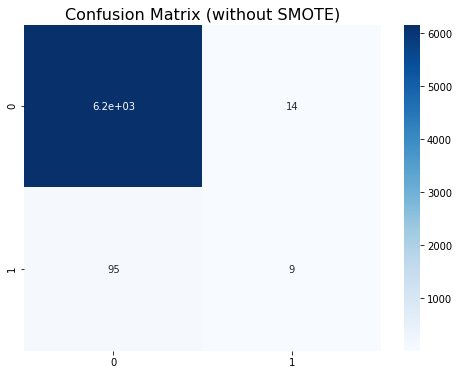

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix

# Train
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
preds = model.predict(X_test)

# Evaluate
print(f'Accuracy = {accuracy_score(y_test, preds):.2f}\nRecall = {recall_score(y_test, preds):.2f}\n')
cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix (without SMOTE)', size=16)
sns.heatmap(cm, annot=True, cmap='Blues')

## Machine Learning with SMOTE

In [9]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=35)

X_sm, y_sm = sm.fit_resample(X, y)

print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_sm.shape}''')

print('\nBalance of positive and negative classes (%):')
y_sm.value_counts(normalize=True) * 100

Shape of X before SMOTE: (25134, 29)
Shape of X after SMOTE: (49424, 29)

Balance of positive and negative classes (%):


0    50.0
1    50.0
Name: TARGET, dtype: float64

Accuracy = 0.99
Recall = 0.99



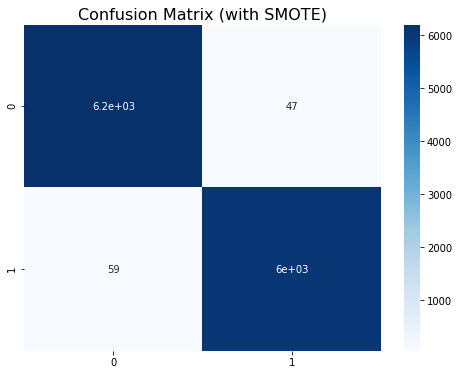

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X_sm, y_sm, test_size=0.25, random_state=35
)

model = RandomForestClassifier(random_state=35)
model.fit(X_train, y_train)
preds = model.predict(X_test)

print(f'Accuracy = {accuracy_score(y_test, preds):.2f}\nRecall = {recall_score(y_test, preds):.2f}\n')
cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix (with SMOTE)', size=16)
sns.heatmap(cm, annot=True, cmap='Blues');
